In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

944
16


In [3]:
# data_file_path

In [4]:
#发作为1；未发作为0
y_train=[]
for i in train_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in test_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

944
496
16
14


In [5]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16

In [6]:
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_train:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

7552


In [7]:
y_long_test_data=[]
for i in y_test:
    for j in range((int)(test_SE_len/2)):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

128


In [8]:
import scipy.signal
import scipy.io as scio   
#设定为2s一段
samps = 2

In [9]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   

Opening raw data file ../SE_train_processed\Z何富桂20220221(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.

Opening raw data file ../SE_train_processed\Z何富桂20220221(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(permutation_1).fif

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220228(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220302(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220302(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 se

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220314(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220314(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220314(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw d

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220309(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220309(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220309(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_2.fif...
Isotrak not found
    R

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Re

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220316(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220316(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220225(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, 

Opening raw data file ../SE_train_processed\Z刘家瑞20220302(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220302(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg

Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg

Opening raw data file ../SE_train_processed\Z周小凯20220321(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(scal

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220321(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220321(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220321(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.

Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(sca

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.

Opening raw data file ../SE_train_processed\Z张璐20220228(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(scale_down).fif..

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220228(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220228(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220228(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_t

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.f

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_17.fif...
Isotrak not found
    

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../S

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220223(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

Opening raw data file ../SE_train_processed\Z曾刚20220216(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）(origi

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220216(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220216(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220216(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, 

Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file .

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220316(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220316(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw da

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220223(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220223(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220223(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.99

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220321(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220321(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220321(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_20.fif...
Isotrak not found
    R

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Opening raw data file ../SE_train_processed\Z林儒波20220325(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220325(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波2022032

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220325(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220325(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =   

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_16.fif...
Isotrak not found
    

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 .

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =    

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡2022

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220321(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220321(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220321(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif,

Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220321(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220321(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220321(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220328(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220328(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220328(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_11.fif...
Isotrak not found
    Range 

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file .

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Opening raw data file ../SE_train_processed\Z肖智华20220228(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(permutation_3).

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220228(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220302(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220302(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs


<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220323(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220325(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220325(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220316(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220316(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220316(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.

Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file 

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Opening raw data file ../SE_train_processed\Z黄金燕20220309(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220311(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220311(jitter

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220309(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220309(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220309(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220223(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220223(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fi

Opening raw data file ../SE_train_processed\Z齐金钢20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220228(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220228(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(permutation_1).fif

<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220228(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220228(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-9-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220228(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

In [10]:
x_train=np.array(x_train)
x_train.shape

(7552, 15, 512)

In [11]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)  

Opening raw data file ../SE_test_processed\Z宋志辉20220318.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220321.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220323.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220325.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z李玉萍20220216.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z李玉萍20220218.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z李玉萍20220221（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
R

<ipython-input-11-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-11-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-11-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220323.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, 

In [12]:
x_test=np.array(x_test)
x_test.shape

(128, 15, 512)

In [13]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter
0,1
1,1
2,1
3,1
4,1
...,...
939,3
940,3
941,3
942,3


In [14]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter
0,3
1,2
2,1
3,4
4,3
5,1
6,4
7,2
8,4
9,1


In [15]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(7552, 2)

In [16]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了15通道
long_ECT_code_test = [i for i in test_ECT_code for k in range((int)(test_SE_len/2))]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(128, 2)

In [17]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape,x_test.shape)

(7552, 15, 512, 1) (128, 15, 512, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [25]:

# 每次都要记得更改输入的shape
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv2D(64,(5,5),padding='same',activation='relu')(input1)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv1)#64*256

conv2=tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv2)#32*128

conv3=tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv3)#16*64

flatten1=tf.keras.layers.Flatten()(pool3)

dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
drop1=tf.keras.layers.Dropout(0.3)(dense1)
dense2=tf.keras.layers.Dense(64,activation='relu')(dense1)
drop2=tf.keras.layers.Dropout(0.1)(dense2)

dense3=tf.keras.layers.Dense(20,activation='relu')(input2)
dense4=tf.keras.layers.Dense(10,activation='relu')(dense3)

concatenate1=tf.keras.layers.Concatenate()([drop2,dense4])

dense5=tf.keras.layers.Dense(20,activation='relu')(concatenate1)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense5)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [26]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 15, 512, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 15, 512, 64)  1664        input_7[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 8, 256, 64)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 8, 256, 32)   51232       max_pooling2d_9[0][0]            
____________________________________________________________________________________________

In [27]:
# tf.keras.utils.plot_model(model, to_file="../img/model.png",show_shapes=True)

In [28]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [ ]:
#方便命名模型
my_epochs=10
my_batch_size=16
my_validation_split=0.2
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1,
                    validation_split = my_validation_split
                   )

Epoch 1/10
378/378 [==============================] - 78s 207ms/step - loss: 0.0048 - accuracy: 0.9949 - val_loss: 0.1802 - val_accuracy: 0.8054
Epoch 2/10
378/378 [==============================] - 82s 218ms/step - loss: 0.0035 - accuracy: 0.9959 - val_loss: 0.1729 - val_accuracy: 0.8167
Epoch 3/10
378/378 [==============================] - 87s 231ms/step - loss: 0.0029 - accuracy: 0.9970 - val_loss: 0.1809 - val_accuracy: 0.7962
Epoch 4/10
344/378 [==========================>...] - ETA: 7s - loss: 0.0027 - accuracy: 0.9973

In [ ]:
# print(x_train.shape)
# print(y_train.shape)

In [ ]:
loss_,acc_ = model.evaluate([x_train,long_ECT_code],y_train)

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)#方便实用validation_split
long_ECT_code_test = np.array(long_ECT_code_test)
loss_,acc_ = model.evaluate([x_test,long_ECT_code_test],y_test)

In [60]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(acc) + 1)

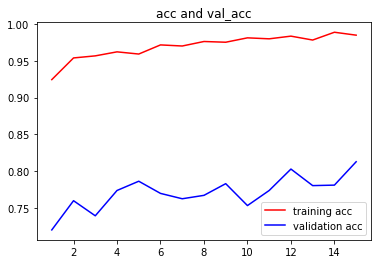

In [61]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

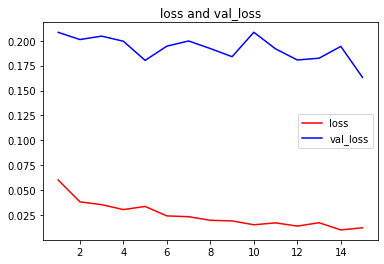

In [72]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [63]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(acc_)[:8] + "_.h5")

In [31]:
# loaded_model = tf.keras.models.load_model('../model_save/model_1_ECT+16s_40_0.7524510025978088_.h5')

In [32]:
# loss_,acc_ = loaded_model.evaluate([x_test,long_ECT_code_test],y_test)

In [33]:
# loss_,acc_ = loaded_model.evaluate([x_train,long_ECT_code],y_train)